In [1]:
import statsmodels.api as sm
import wooldridge as woo
import matplotlib as plt
ceosali = woo.dataWoo('ceosal1')
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Choose a dependent variable and one or more independent variables
# For example, 'salary' as the dependent variable and 'roe' (rate of return on equity) as an independent variable
Y = ceosali['salary']
X = ceosali['roe']

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Create an OLS model and fit it
model = sm.OLS(Y, X)
results = model.fit()

# Print the summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Tue, 23 Jan 2024   Prob (F-statistic):             0.0978
Time:                        17:01:35   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        963.1913    213.240      4.517      0.0

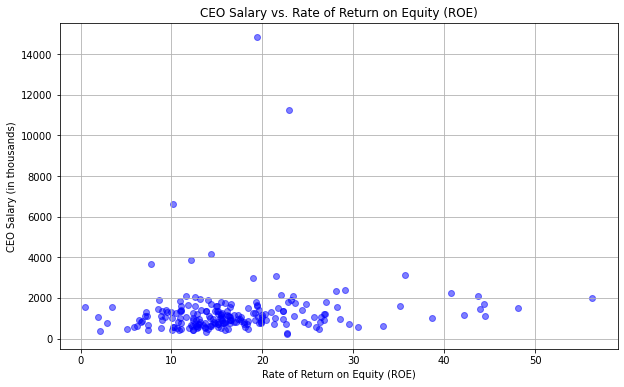

In [3]:
salary = ceosali['salary']
roe = ceosali['roe']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(roe, salary, color='blue', alpha=0.5)
plt.title('CEO Salary vs. Rate of Return on Equity (ROE)')
plt.xlabel('Rate of Return on Equity (ROE)')
plt.ylabel('CEO Salary (in thousands)')
plt.grid(True)
plt.show()

In [4]:
salary_hat = results.fittedvalues

In [5]:
u_hat=results.resid


In [6]:
table = pd.DataFrame ({"roe":roe,'salary':salary, 'salary_hat':salary_hat, 'u_hat':u_hat})

In [7]:
table.head()

,roe,salary,salary_hat,u_hat
0,14.1,1095,1224.058071,-129.058071
1,10.9,1001,1164.854261,-163.854261
2,23.5,1122,1397.969216,-275.969216
3,5.9,578,1072.348338,-494.348338
4,13.8,1368,1218.507712,149.492288


In [8]:
import numpy as np
u_hat_mean = np.mean(u_hat)


In [9]:
u_hat_mean

-3.046154503545693e-13

In [10]:
wage1 = woo.dataWoo('wage1')

In [11]:
wage1

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1


In [13]:
u_hat

0     -129.058071
1     -163.854261
2     -275.969216
3     -494.348338
4      149.492288
          ...    
204   -199.702014
205   -724.959725
206   -529.055698
207   -661.657586
208   -603.608413
Length: 209, dtype: float64

In [15]:
roe

0      14.1
1      10.9
2      23.5
3       5.9
4      13.8
       ... 
204     9.0
205    15.5
206    12.1
207    13.7
208    14.4
Name: roe, Length: 209, dtype: float64

In [16]:
education_u_cov = np.cov(roe, u_hat)[1, 0]


In [17]:
education_u_cov

-3.9413181777865136e-13

In [18]:
roe

0      14.1
1      10.9
2      23.5
3       5.9
4      13.8
       ... 
204     9.0
205    15.5
206    12.1
207    13.7
208    14.4
Name: roe, Length: 209, dtype: float64